In [1]:
import pandas
import numpy
import joypy

import matplotlib.pyplot as plt

In [6]:
fl = "//home/simon/PROJECTS/koios/data/kmeans-profile.tsv"

In [7]:
tab = pandas.read_csv(fl, sep="\t")

In [8]:
tab

,k,within_cluster_variance,explained_variance,total_variance,BIC,Unnamed: 5
0,5,298212.072600,0.281293,414928.290453,300293.609524,NaN
1,10,264448.414429,0.362665,414928.290453,268602.277937,NaN


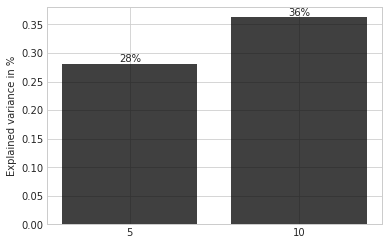

In [26]:
plt.style.use(["seaborn-whitegrid"])
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']


fig, ax = plt.subplots()
ax.set_ylabel('#clusters')
ax.set_ylabel('Explained variance in %')
bar = plt.bar(list(map(str, tab["k"].values)), tab["explained_variance"].values, color="black", alpha=.75)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '{}%'.format(int(float(height) * 100)), ha='center', va='bottom')

plt.show()

In [184]:
ax.get_xlim()[1]

1.0

In [185]:
import glob

In [49]:
cluster_files = "/Users/simondi/PROJECTS/target_infect_x_project/src/tix-analysis/data/kmeans-fit/"
fls = glob.glob(cluster_files + "*cluster_sizes.tsv")

In [50]:
import re

In [51]:
reg = re.compile(".*kmeans-fit-K(\d+)_cluster_sizes.tsv")

In [151]:
tabs = [None] * len(fls)
for i, fl in enumerate(fls):    
    t = pandas.read_csv(fl, sep="\t", header=-1, names="c")
    idx = int(reg.match(fl).group(1))
    t["index"] = str(idx).zfill(9)
    tabs[i] = [idx, t]
tabs = sorted(tabs, key=lambda x: x[0])
tabs = list(filter(lambda x: x[0] in tab["k"].values , tabs))
df = pandas.concat(map(lambda x: x[1], tabs))

In [53]:
list(map(lambda x: "K = {}".format(x[0]), tabs))

['K = 6', 'K = 8', 'K = 9', 'K = 10']

/Users/simondi/miniconda3/envs/tix/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


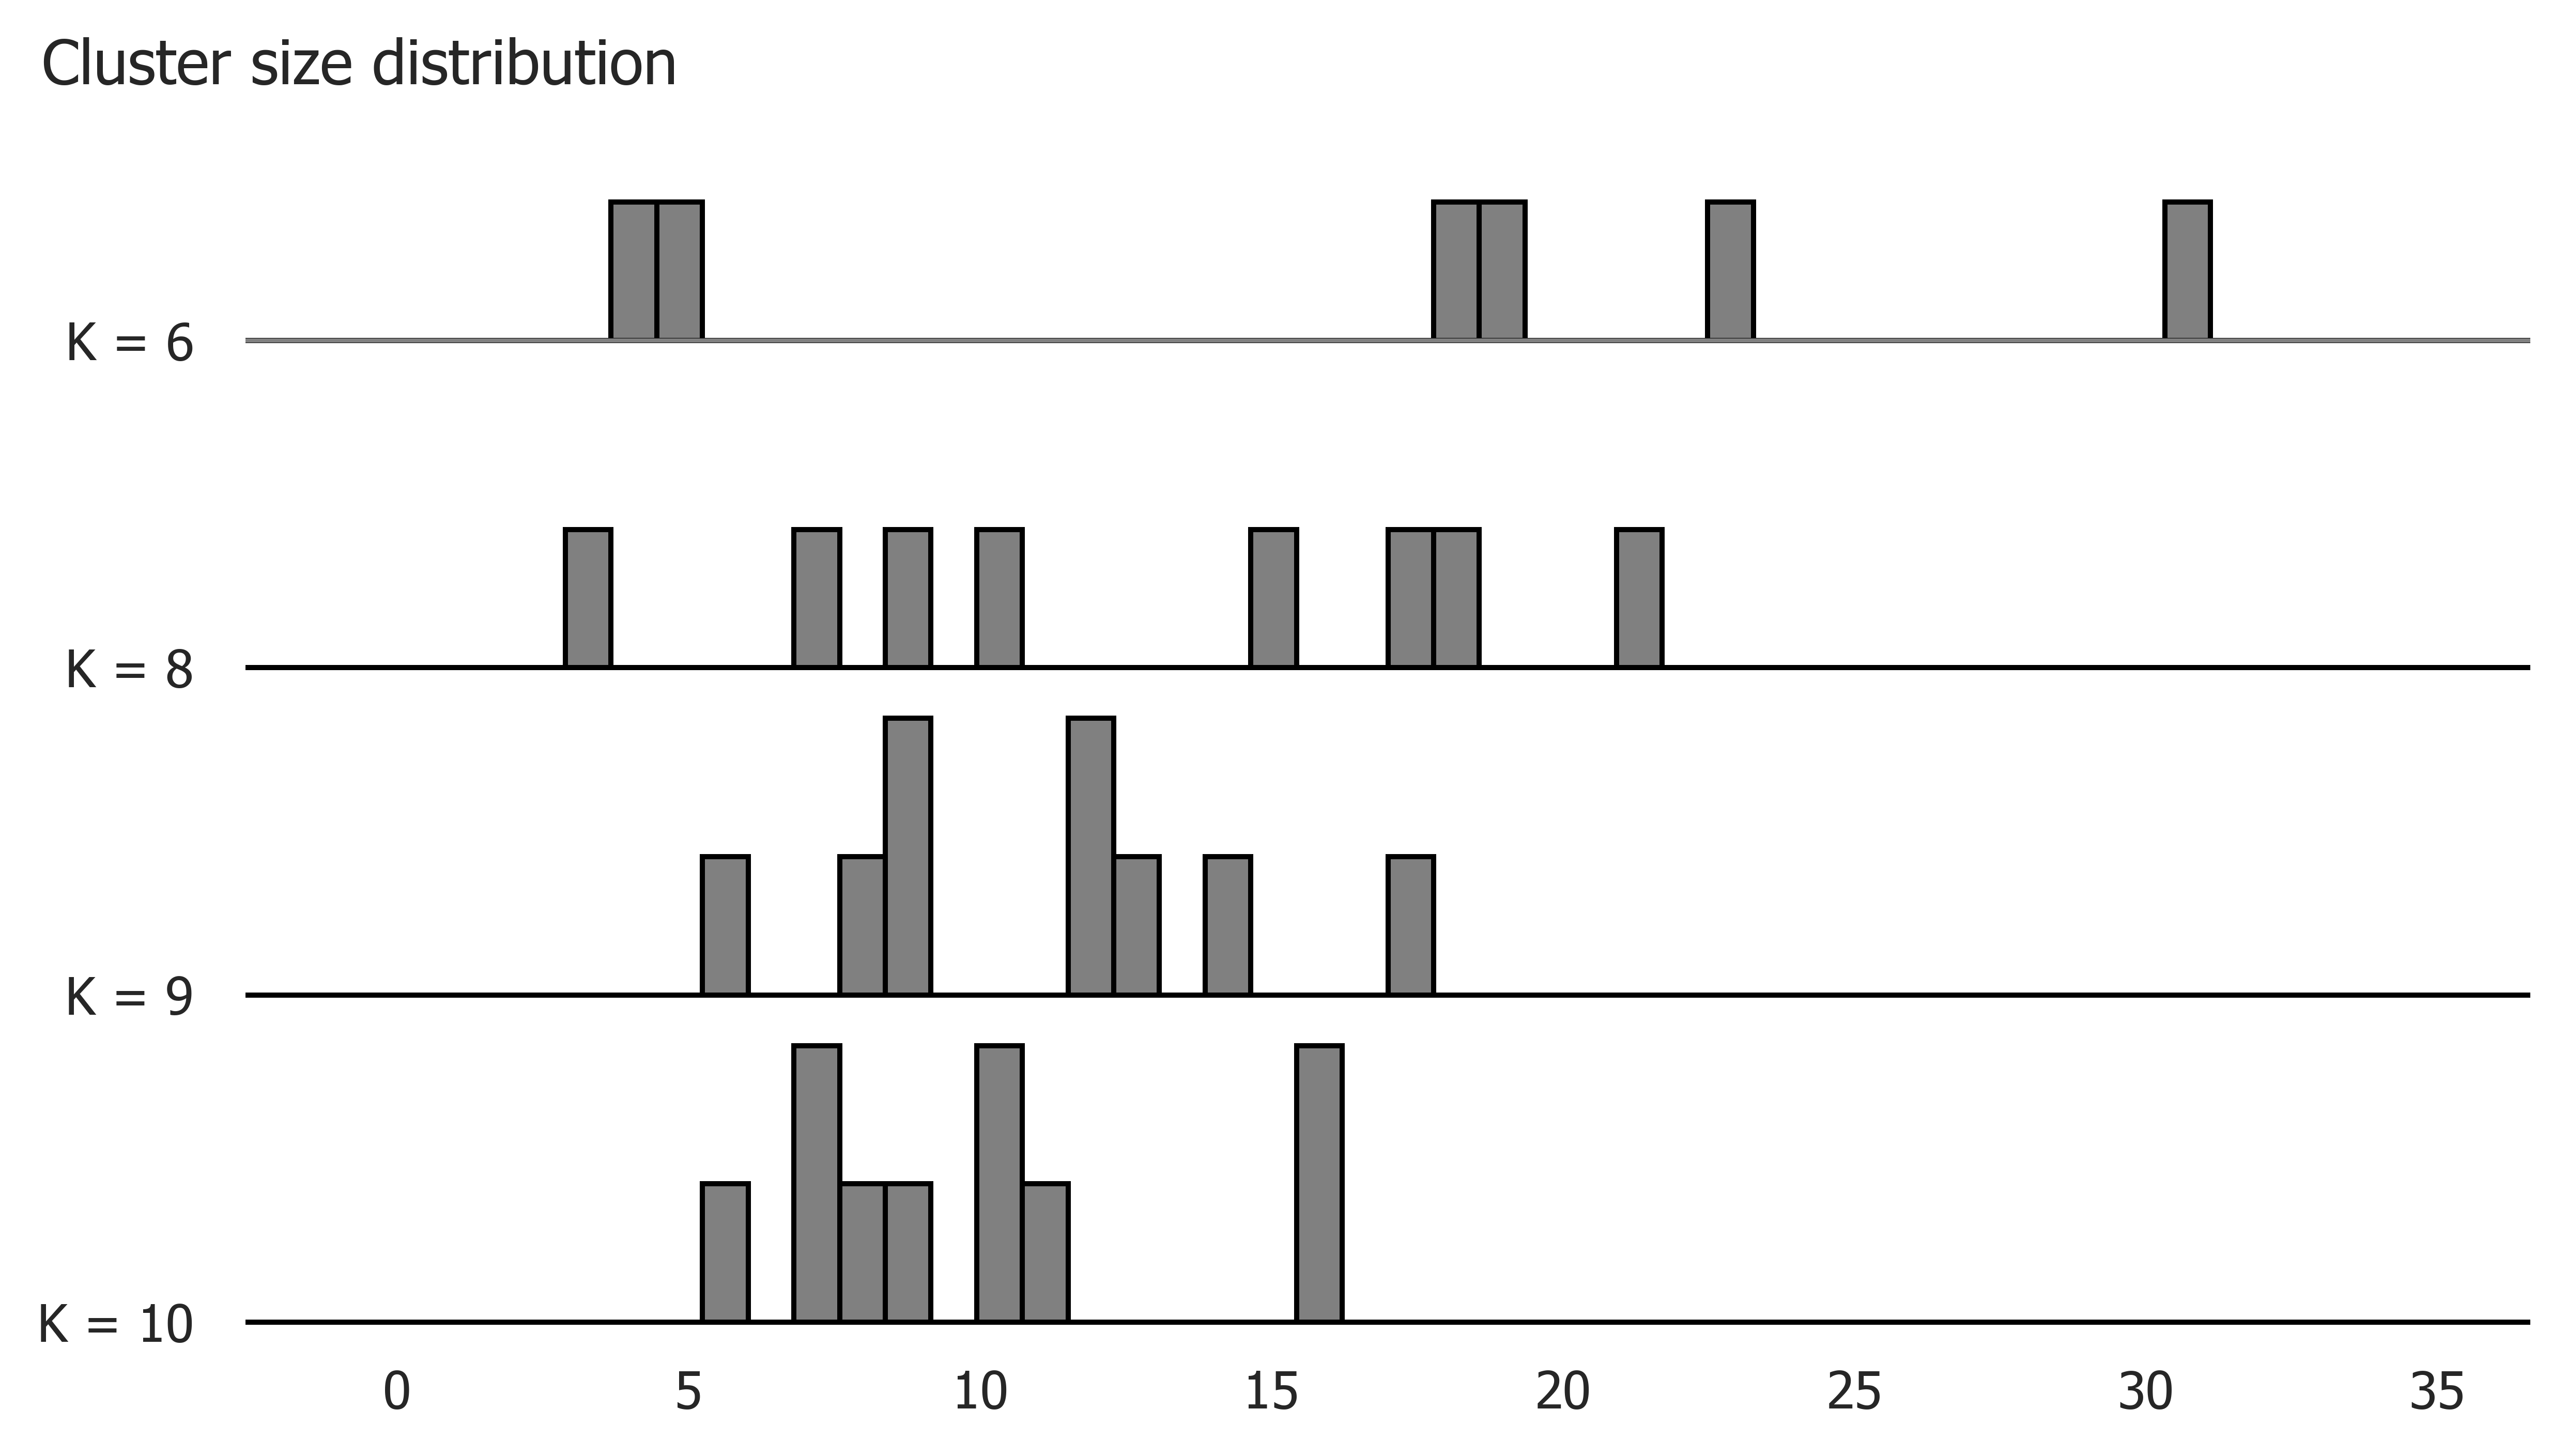

In [56]:
plt.style.use(["seaborn-whitegrid"])
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

_, ax = plt.subplots(figsize=(7, 4), dpi=720)
fig, axes = joypy.joyplot(df, by="index", hist="True", ax=ax,
                          bins=50, overlap=0, grid="y", color="grey",
                          labels=list(map(lambda x: "K = {}".format(x[0]), tabs)))
for x in axes:
    x.spines['bottom'].set_color('grey')
    x.grid(color="grey",axis="y")
plt.title("Cluster size distribution", x=.05, y=.9)
plt.show()

In [60]:
tabs = list(filter(lambda x: x[0] in tab["k"].values , tabs))

In [144]:
k = df.groupby("index").quantile([0, 0.25, 0.5, 0.75, 1])

In [147]:
df["index"] = "K" + format(df["index"].astype(int))

In [155]:
s = df.groupby("index").quantile([0, 0.25, 0.5, 0.75, 1]).unstack("index")["c"]

In [165]:
s["quantile"] = list(map(lambda x: x,s.index))

In [167]:
s.columns = k

Index(['000000006', '000000008', '000000009', '000000010', 'k', 'quantile'], dtype='object', name='index')

In [100]:
isinstance(s, pandas.DataFrame)

True

In [168]:
s

index,000000006,000000008,000000009,000000010,k,quantile
0.00,4.00,3.00,6.0,6.00,0.00,0.00
0.25,8.25,8.50,9.0,7.25,0.25,0.25
0.50,18.50,12.50,12.0,9.50,0.50,0.50
0.75,22.00,17.25,13.0,10.75,0.75,0.75
1.00,31.00,21.00,17.0,16.00,1.00,1.00
